In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from scipy import stats as st
import datetime as dt
import math as mth
import warnings
from io import BytesIO
import requests

## Оглавление

+ [Описание проекта](#project_description)


+ [Описание данных](#data_description)


+ [Шаг 1. Откройте файл с данными](#step_1)


+ [Шаг 2. Подготовьте данные](#step_2)
	- [Замена названий столбцов](#task_1)
	- [Проверка пропусков и типов данных](#task_2)
	- [Добавляем столбец даты и времени](#task_3)


+ [Шаг 3. Изучите и проверьте данные](#step_3)
	- [Сколько событий в логе](#task_4)
	- [Сколько пользователей в логе](#task_5)
	- [Сколько событий приходится на пользователя](#task_6)

	- [Данными за какой период вы располагаете](#task_7)
	- [Проверим корректность проведенного А\В теста](#task_8)


+ [Шаг 4. Изучите воронку событий](#step_4)
	- [Какие событияесть в логах и на сколько часто они встречаются](#task_9)
	- [Сколько пользователей совершали каждое из событий](#task_10)
	- [Какая доля пользователей проходит на следующий шаг воронки](#task_12)
	- [На каком шаге теряете больше всего пользователей](#task_13)
	- [Какая доля пользователей доходит от первого события до оплаты?](#task_14)


+ [Шаг 5. Изучите результаты эксперимента](#step_5)
	- [Сколько пользователей в каждой экспериментальной группе?](#task_15)
	- [Находят ли статистические критерии разницу между выборками 246 и 247.](#task_16)
	- [Аналогично поступите с группой с изменённым шрифтом](#task_17)
	- [Какой уровень значимости вы выбрали при проверке статистических гипотез выше?](#task_18)


+ [Вывод](#conclusion)

##  <a name="project_description"></a> Описание проекта

Вы работаете в стартапе, который продаёт продукты питания. Нужно разобраться, как ведут себя пользователи вашего мобильного приложения. 

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, вы можете быть уверены в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

В случае общей аналитики и A/A/B-эксперимента работайте с одними и теми же данными. В реальных проектах всегда идут эксперименты. Аналитики исследуют качество работы приложения по общим данным, не учитывая принадлежность пользователей к экспериментам.

---

## <a name="data_description"></a> Описание данных

Каждая запись в логе — это действие пользователя, или событие. 

`EventName` — название события;

`DeviceIDHash` — уникальный идентификатор пользователя;

`EventTimestamp` — время события;

`ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

---

## <a name="step_1"></a> Шаг 1. Откройте файл с данными и изучите общую информацию

In [67]:
spreadsheet_id = '1NAYo1AbUK1vlLkaMHwTQNhFRiK0-xnIY_DkC_VRtluY'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
logs = pd.read_csv(BytesIO(r.content))
logs

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


---

## <a name="step_2"></a>  Шаг 2. Подготовьте данные

###  <a name="task_1"></a>  1. Замените названия столбцов на удобные для вас;

In [68]:
logs.rename(columns = {'EventName': 'event_name',
                      'DeviceIDHash': 'device_id_hash',
                       'EventTimestamp': 'event_timestamp',
                       'ExpId': 'exp_id'
                      }, inplace = True)
logs

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


**Также приведем события в столбце event_name к нижнему регистру:**

In [69]:
logs['event_name'] = logs['event_name'].str.lower()
logs

,event_name,device_id_hash,event_timestamp,exp_id
0,mainscreenappear,4575588528974610257,1564029816,246
1,mainscreenappear,7416695313311560658,1564053102,246
2,paymentscreensuccessful,3518123091307005509,1564054127,248
3,cartscreenappear,3518123091307005509,1564054127,248
4,paymentscreensuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,mainscreenappear,4599628364049201812,1565212345,247
244122,mainscreenappear,5849806612437486590,1565212439,246
244123,mainscreenappear,5746969938801999050,1565212483,246
244124,mainscreenappear,5746969938801999050,1565212498,246


###  <a name="task_2"></a>  2. Проверьте пропуски и типы данных. Откорректируйте, если нужно

In [70]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   device_id_hash   244126 non-null  object
 2   event_timestamp  244126 non-null  int64 
 3   exp_id           244126 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 7.5+ MB


**Посмотрим есть ли пропуски в столбцаx:**

In [71]:
logs['event_name'].isna().value_counts()

False    244126
Name: event_name, dtype: int64

In [72]:
logs['device_id_hash'].isna().value_counts()

False    244126
Name: device_id_hash, dtype: int64

In [73]:
logs['event_timestamp'].isna().value_counts()

False    244126
Name: event_timestamp, dtype: int64

In [74]:
logs['exp_id'].isna().value_counts()

False    244126
Name: exp_id, dtype: int64

Пропусков нет!

**Посмотрим есть ли дубликаты в столбцаx:**

In [75]:
logs.duplicated().sum()

413

**Удалим дубликаты:**

In [76]:
logs = logs.drop_duplicates()
logs.duplicated().sum()
logs.reset_index(drop=True)


,event_name,device_id_hash,event_timestamp,exp_id
0,mainscreenappear,4575588528974610257,1564029816,246
1,mainscreenappear,7416695313311560658,1564053102,246
2,paymentscreensuccessful,3518123091307005509,1564054127,248
3,cartscreenappear,3518123091307005509,1564054127,248
4,paymentscreensuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
243708,mainscreenappear,4599628364049201812,1565212345,247
243709,mainscreenappear,5849806612437486590,1565212439,246
243710,mainscreenappear,5746969938801999050,1565212483,246
243711,mainscreenappear,5746969938801999050,1565212498,246


Дубликатотв нет!

**Поменяем типы данных там, где это нужно:**

In [77]:
warnings.filterwarnings("ignore")

logs['event_timestamp'] = pd.to_datetime(logs['event_timestamp'], unit='s')
logs.head()

,event_name,device_id_hash,event_timestamp,exp_id
0,mainscreenappear,4575588528974610257,2019-07-25 04:43:36,246
1,mainscreenappear,7416695313311560658,2019-07-25 11:11:42,246
2,paymentscreensuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,cartscreenappear,3518123091307005509,2019-07-25 11:28:47,248
4,paymentscreensuccessful,6217807653094995999,2019-07-25 11:48:42,248


###  <a name="task_3"></a> 3. Добавьте столбец даты и времени, а также отдельный столбец дат;

In [78]:
warnings.filterwarnings("ignore")

logs['date'] = logs.event_timestamp.dt.date
logs.head()

,event_name,device_id_hash,event_timestamp,exp_id,date
0,mainscreenappear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,mainscreenappear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,paymentscreensuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,cartscreenappear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,paymentscreensuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


In [79]:
gr = logs.groupby('device_id_hash').agg({'exp_id' : 'nunique'})
print(gr)

                     exp_id
device_id_hash             
1000608915523616548       1
100724994572555335        1
1008242126838007188       1
1009503747199967885       1
1009745980451513098       1
...                     ...
992321565231279868        1
993193057518949787        1
995065401066914588        1
997141886226099626        1
997959739029313547        1

[7551 rows x 1 columns]


In [80]:
gr.loc[gr['exp_id'] > 1].count()

exp_id    0
dtype: int64

Все пользователи находятся в уникальных экпериментальных группах. Ни один из пользователей не попал в более чем одну экспериментальную группу.

---

##  <a name="step_3"></a>  Шаг 3. Изучите и проверьте данные

### <a name="task_4"></a>  1. Сколько всего событий в логе?

In [81]:
logs['event_name'].value_counts()

mainscreenappear           119101
offersscreenappear          46808
cartscreenappear            42668
paymentscreensuccessful     34118
tutorial                     1018
Name: event_name, dtype: int64

Как мы видим в логе 5 различных вариантов событий.

### <a name="task_5"></a>  2. Сколько всего пользователей в логе?

In [82]:
len(logs['device_id_hash'].unique())

7551

Всего в логе участвовало 7551 уникальных девайсов.


### <a name="task_6"></a> 3. Сколько в среднем событий приходится на пользователя?

In [83]:
events_for_users = logs.pivot_table(index='device_id_hash',values='event_name',aggfunc='count')
round(events_for_users['event_name'].mean(), 2)

32.28

В среднем на одного пользователя приходится 32.28 событий.

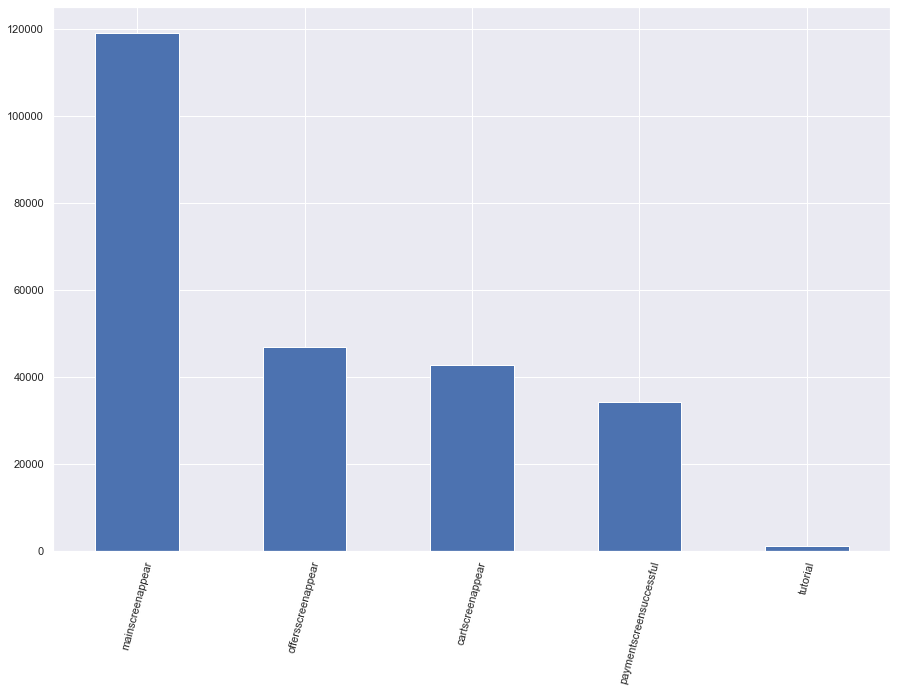

In [84]:
events = logs['event_name'].value_counts()
events.plot.bar()
plt.xticks(rotation=75)
sns.set(rc={'figure.figsize':(15,10)});

Из столбчатой диаграммы мы видим, что самое популярное событие у пользователей — это открытие главного экрана, далее три события имеют практически одинаковую популярность у пользователей и событие показ туториала самое не популярное.	


### <a name="task_7"></a>  4. Данными за какой период вы располагаете?

#### Найдите максимальную и минимальную дату. 

In [85]:
print('Максимальная дата:', max(logs['date']))

Максимальная дата: 2019-08-07


In [86]:
print('Минимальная дата:', min(logs['date']))

Минимальная дата: 2019-07-25


#### Постройте гистограмму по дате и времени. 

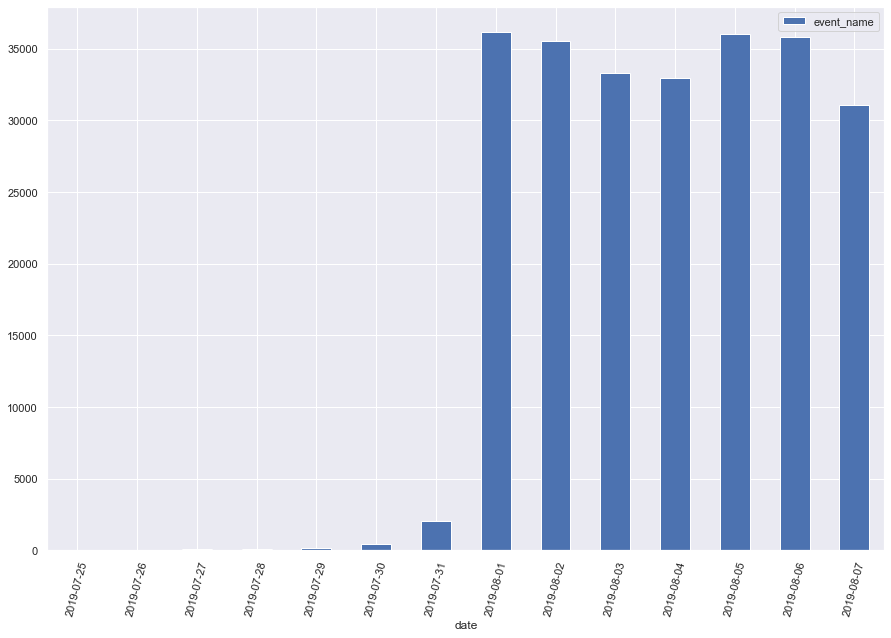

In [87]:
events_grouped = logs[['date', 'event_name']]

events_grouped = events_grouped.groupby('date')['event_name'].count()

events_grouped = events_grouped.to_frame()
events_grouped.plot.bar()
plt.xticks(rotation=75)

sns.set(rc={'figure.figsize':(15,10)});

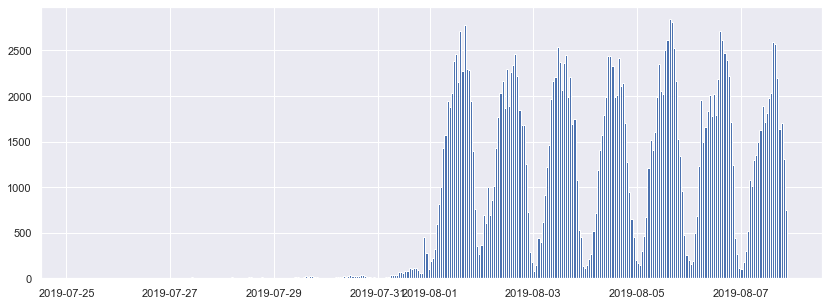

In [88]:
logs['event_timestamp'].hist(bins=14*24, figsize=(14, 5));

#### Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого  — это может «перекашивать данные».

Мы видим, что до 2019-08-01 данных очень мало, и только начиная в 1-ого числа совешается большое колличество событий. Скорее всего именно в этот момент данные доехали и с этого момента мы можем оценивать результаты проведения эксперимента.

#### Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?

Из предыдущих рассчетов мы определили, что полные данные начинаются с 2019-08-01, соответственно мы можем отбросить все что было до этого момента.

In [89]:
logs['date'] = pd.to_datetime(logs['date'])
logs_new = logs.query('date > "2019-07-31"')
logs_new.groupby('date')['event_name'].count()

date
2019-08-01    36141
2019-08-02    35554
2019-08-03    33282
2019-08-04    32968
2019-08-05    36058
2019-08-06    35788
2019-08-07    31096
Name: event_name, dtype: int64

Теперь у нас остались данные за последние 7 дней.

#### Много ли событий и пользователей вы потеряли, отбросив старые данные?

In [90]:
print('Колличество потерянных значений:' , logs['event_name'].count() - logs_new['event_name'].count())
print('Процент потерянных значений от изначального числа событий:', 
      round((logs['event_name'].count() - logs_new['event_name'].count())/logs['event_name'].count(), 4)
     )

Колличество потерянных значений: 2826
Процент потерянных значений от изначального числа событий: 0.0116


Мы видим, что в итоге мы потеряли всего 1.16% событий.

**Сколько пользователей мы потеряли:**

In [91]:
# Уникальные пользователи по событиям в старых данных:
logs_old_pivot = logs.pivot_table(index = 'event_name', 
                                  values = 'device_id_hash', 
                                  aggfunc = 'nunique'
                                 ).sort_values(by = 'device_id_hash', 
                                               ascending = False)

In [92]:
# Уникальные пользователи по событиям в новых данных:
logs_pivot = logs_new.pivot_table(index = 'event_name', 
                                  values = 'device_id_hash', 
                                  aggfunc = 'nunique'
                                 ).sort_values(by = 'device_id_hash', 
                                               ascending = False)

In [93]:
diff = logs_old_pivot - logs_pivot #потерянные пользователи по событиям
display(diff)

,device_id_hash
event_name,
mainscreenappear,20
offersscreenappear,20
cartscreenappear,15
paymentscreensuccessful,8
tutorial,7


In [94]:
print('Всего мы потеряли', diff['device_id_hash'].sum(), 'пользователей')

Всего мы потеряли 70 пользователей


In [95]:
 print('Потерянные пользователи составляют', round(diff['device_id_hash'].sum() / len(logs['device_id_hash'].unique()) *100, 3) , '% от изначального числа пользователей')

Потерянные пользователи составляют 0.927 % от изначального числа пользователей


#### Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

In [96]:
logs_new['exp_id'].value_counts()

248    84563
246    79302
247    77022
Name: exp_id, dtype: int64

В наших данных есть пользователи из всех трех экспериментальных групп.

### <a name="task_8"></a>  5. Проверим корректность проведенного А\В теста:


In [97]:
a_b_table = logs.pivot_table(index = 'exp_id',
                                   columns = 'event_name',
                                   values = 'device_id_hash',
                                   aggfunc = 'nunique').reset_index()

del a_b_table['tutorial']


a_b_table

event_name,exp_id,cartscreenappear,mainscreenappear,offersscreenappear,paymentscreensuccessful
0,246,1270,2456,1545,1202
1,247,1240,2482,1530,1160
2,248,1239,2501,1538,1185


In [98]:
a_b_count = logs.groupby('exp_id')['device_id_hash'].nunique()
a_b_table['users_count'] = a_b_table['exp_id'].apply(lambda x: users_count.loc[x])
a_b_table = a_b_table.set_index('exp_id')
a_b_table

event_name,cartscreenappear,mainscreenappear,offersscreenappear,paymentscreensuccessful,users_count
exp_id,,,,,
246,1270,2456,1545,1202,2484
247,1240,2482,1530,1160,2513
248,1239,2501,1538,1185,2537


In [99]:
a_b_table['conversion'] = a_b_table['paymentscreensuccessful'] / a_b_table['users_count']
a_b_table

event_name,cartscreenappear,mainscreenappear,offersscreenappear,paymentscreensuccessful,users_count,conversion
exp_id,,,,,,
246,1270,2456,1545,1202,2484,0.483897
247,1240,2482,1530,1160,2513,0.461600
248,1239,2501,1538,1185,2537,0.467087


In [100]:
initial_conversion = a_b_table['conversion'][246]
resulting_conversion = a_b_table['conversion'][248]

In [101]:
change = abs(1-(initial_conversion/resulting_conversion))

In [102]:
print('Начальная конверсия:', initial_conversion)
print('Полученная после изменений конверсия:', resulting_conversion)
print('Относительное изменение конверсии после изменений:', change)

Начальная конверсия: 0.48389694041867953
Полученная после изменений конверсия: 0.46708711076074105
Относительное изменение конверсии после изменений: 0.035988639529274113


Проверим в калькуляторе (https://www.evanmiller.org/ab-testing/sample-size.html) необходимый размер выборки для проведения теста.

Вводим Baseline conversion rate = 48.39% и Minimum Detectable Effect = 3.59%, также указываем тип "Relative".

Минимальный размер выборки 12 993, у нас 243 713.

Проведенный А\В тест можно считать корректным.

---

## <a name="step_4"></a>  Шаг 4. Изучите воронку событий

###  <a name="task_9"></a> 1. Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

In [103]:
logs_new.head()

,event_name,device_id_hash,event_timestamp,exp_id,date
2828,tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2829,mainscreenappear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2830,mainscreenappear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2831,offersscreenappear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2832,mainscreenappear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01


In [104]:
logs_new['event_name'].value_counts()

mainscreenappear           117328
offersscreenappear          46333
cartscreenappear            42303
paymentscreensuccessful     33918
tutorial                     1005
Name: event_name, dtype: int64

Чаще всего происходит событие 'mainscreenappear' - показ пользователю главного экрана. Реже всего пользователи открывают туториал в приложении, колличество события 'tutorial' сильно ниже, чемм все остальные.

###  <a name="task_10"></a> 2. Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей.

In [105]:
logs_pivot = logs_new.pivot_table(index = 'event_name', 
                                  values = 'device_id_hash', 
                                  aggfunc = 'nunique'
                                 ).sort_values(by = 'device_id_hash', 
                                               ascending = False)
logs_pivot

,device_id_hash
event_name,
mainscreenappear,7419
offersscreenappear,4593
cartscreenappear,3734
paymentscreensuccessful,3539
tutorial,840


Больше всего уникальных пользователей открывли главный экран и меньше всего уникальных пользователей заходили в туториал. 

#### Посчитайте долю пользователей, которые хоть раз совершали событие.

In [106]:
logs_pivot['%'] = round(logs_pivot['device_id_hash'] / logs_new['device_id_hash'].nunique(), 3)*100
logs_pivot

,device_id_hash,%
event_name,,
mainscreenappear,7419,98.5
offersscreenappear,4593,61.0
cartscreenappear,3734,49.6
paymentscreensuccessful,3539,47.0
tutorial,840,11.1


98.5 пользователей открывали главный экран и только 11% заходило в туториал.

###  <a name="task_11"></a> 3. Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

1. Пользователь заходит в приложение и видит главный экран;
2. Пользователь заходит на экран покупок;
3. Пользователь выбирает конкретного кота на экране покупок и переходит на отдельную страницу с доп информацией по этому конкретному коту;
4. Пользователь оплачивает покупку.

Дополнительным шагом может являться экран tutorial, в котором скорее всего пользователей учат работать с приложением, но этот экран не пользуется популярностью и из наших данных не совсем понятно, какой контент может быть на экране tutorial и в какой момент этот экран может использоваться.


###  <a name="task_12"></a>  4. По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). 

То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

В начале - отбросим данные по tutorial, потому что они не занимают конкретного положения в цепочке и не так важны для нашего анализа.

In [107]:
logs_pivot.drop(['tutorial'], inplace=True)
logs_pivot

,device_id_hash,%
event_name,,
mainscreenappear,7419,98.5
offersscreenappear,4593,61.0
cartscreenappear,3734,49.6
paymentscreensuccessful,3539,47.0


Посчитаем проценты пользователей на каждом шаге от предыдущего:

In [108]:
logs_pivot['conversion'] = round((logs_pivot['device_id_hash'].pct_change().fillna(0)+1)*100, 2)
logs_pivot

,device_id_hash,%,conversion
event_name,,,
mainscreenappear,7419,98.5,100.00
offersscreenappear,4593,61.0,61.91
cartscreenappear,3734,49.6,81.30
paymentscreensuccessful,3539,47.0,94.78


**Построим воронку для того, чтобы более наглядно увидеть, на каких этапах сколько пользователей мы теряем.**

In [109]:
import plotly.express as px
data = dict(
    number=logs_pivot['device_id_hash'],
    stage=["mainscreenappear", "offersscreenappear", "cartscreenappear", "paymentscreensuccessful"])
fig = px.funnel(data, x='number', y='stage')
fig.show()

###  <a name="task_13"></a> 5. На каком шаге теряете больше всего пользователей?

Мы видим, что больше всего пользователей мы теряем в момент перехода с главного экрана на экран покупок. Если пользователей перешел на экран покупок, от вероятность, что в итоге он купит что-то уже очень большая.

### <a name="task_14"></a>  6. Какая доля пользователей доходит от первого события до оплаты?

Для того, чтобы узнать, сколько пользователей дойдет и выполнит последний шаг, нужно перемножить вероятноти прохождения всех шагов. В нашем случае вероятность, что пользователь пройдет с первого шага на второй шаг = 61.91% и тп.

In [110]:
print('Доля пользователй от первого события до оплаты:', round(0.6191 * 0.813 * 0.9478 * 100, 3), '%')

Доля пользователй от первого события до оплаты: 47.705 %


In [111]:
print('Доля пользователй от первого события до оплаты:', round(logs_pivot['conversion']['offersscreenappear']/100 
      * logs_pivot['conversion']['cartscreenappear']/100 
      * logs_pivot['conversion']['paymentscreensuccessful']/100 
      * 100, 3), '%')

Доля пользователй от первого события до оплаты: 47.705 %


---

##  <a name="step_5"></a> Шаг 5. Изучите результаты эксперимента

###  <a name="task_15"></a>  1. Сколько пользователей в каждой экспериментальной группе?

In [112]:
logs_pivot_groupes = logs_new.pivot_table(index = 'exp_id', values = 'device_id_hash', aggfunc = 'nunique')
logs_pivot_groupes

,device_id_hash
exp_id,
246,2484
247,2513
248,2537


###  <a name="task_16"></a> 2. Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

**Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?**

Посчитаем, сколько пользователей в разных группах по событиям и группам экперимена:

In [113]:
users_by_events = logs_new.pivot_table(index = 'exp_id',
                                   columns = 'event_name',
                                   values = 'device_id_hash',
                                   aggfunc = 'nunique').reset_index()

del users_by_events['tutorial']


users_by_events

event_name,exp_id,cartscreenappear,mainscreenappear,offersscreenappear,paymentscreensuccessful
0,246,1266,2450,1542,1200
1,247,1238,2476,1520,1158
2,248,1230,2493,1531,1181


**Добвим общее колличество пользователей в группах эксперимента:**

In [114]:
users_count = logs_new.groupby('exp_id')['device_id_hash'].nunique()
users_by_events['users_count'] = users_by_events['exp_id'].apply(lambda x: users_count.loc[x])
users_by_events = users_by_events.set_index('exp_id')
users_by_events

event_name,cartscreenappear,mainscreenappear,offersscreenappear,paymentscreensuccessful,users_count
exp_id,,,,,
246,1266,2450,1542,1200,2484
247,1238,2476,1520,1158,2513
248,1230,2493,1531,1181,2537


**Напишим функцию для теста гипотезы по Z-критерию:**

In [115]:
def hypoth_testing(success, trials, alpha):
    
    p1 = success[0] / trials[0]
    p2 = success[1] / trials[1]
    
    p_combined = (success[0]+success[1]) / (trials[1]+trials[0])
    
    difference = p1 - p2
    
    z_value = difference / mth.sqrt(p_combined * (1-p_combined)*(1/trials[0] + 1/trials[1]))
    
    distr = st.norm(0,1)
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-значение: ', p_value)
    
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')


**Напишем функцию для автоматическойпроверки гипотез:**

In [116]:
def auto_test (sample_A, sample_B, alpha):
    
    alpha_test = alpha
    
    count_users = ([users_by_events['users_count'][sample_A], 
                    users_by_events['users_count'][sample_B]])
    
    count_MainScreenAppear = ([users_by_events['mainscreenappear'][sample_A], 
                               users_by_events['mainscreenappear'][sample_B]])
    
    count_OffersScreenAppear = ([users_by_events['offersscreenappear'][sample_A], 
                                 users_by_events['offersscreenappear'][sample_B]])
    
    count_CartScreenAppear = ([users_by_events['cartscreenappear'][sample_A], 
                               users_by_events['cartscreenappear'][sample_B]])
    
    count_PaymentScreenSuccessful = ([users_by_events['paymentscreensuccessful'][sample_A], 
                                      users_by_events['paymentscreensuccessful'][sample_B]])
    
    print('Результаты теста по долям count_users и count_MainScreenAppear для групп')
    hypoth_testing(count_MainScreenAppear, count_users, alpha_test)
    print('')
    
    print('Результаты теста по долям count_OffersScreenAppear и count_users для групп')
    hypoth_testing(count_OffersScreenAppear, count_users, alpha_test)
    print('')
    
    print('Результаты теста по долям count_users и count_CartScreenAppear для групп')
    hypoth_testing(count_CartScreenAppear, count_users, alpha_test)
    print('')
    
    print('Результаты теста по долям count_PaymentScreenSuccessful и count_users для групп')
    hypoth_testing(count_PaymentScreenSuccessful, count_users, alpha_test)

**Запишем гипотезы:**

Нулевая гипотеза: доли уникальных посетителей в экпериментальных группах 246 и 247, побывавших на этапе воронки, одинаковы.

Альтенативная гипотеза: между долями уникальных посетителей в экпериментальных группах 246 и 247, побывавших на этапе воронки, есть значимая разница.

Пусть альфа = 0.1

In [117]:
auto_test(246, 247, 0.1)

Результаты теста по долям count_users и count_MainScreenAppear для групп
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_OffersScreenAppear и count_users для групп
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_users и count_CartScreenAppear для групп
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_PaymentScreenSuccessful и count_users для групп
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Между выборками 246 и 247 нет статистической разницы по всем событиям в группах!

###  <a name="task_17"></a> 3. Аналогично поступите с группой с изменённым шрифтом.

**Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?**

#### 1. Сравним результаты в группе 248 с результатами группы 246:

Нулевая гипотеза: доли уникальных посетителей в экпериментальных группах 246 и 248, побывавших на этапе воронки, одинаковы.

Альтенативная гипотеза: между долями уникальных посетителей в экпериментальных группах 246 и 248, побывавших на этапе воронки, есть значимая разница.

Пусть альфа = 0.1

In [118]:
auto_test(246, 248, 0.1)

Результаты теста по долям count_users и count_MainScreenAppear для групп
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_OffersScreenAppear и count_users для групп
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_users и count_CartScreenAppear для групп
p-значение:  0.07842923237520116
Отвергаем нулевую гипотезу: между долями есть значимая разница

Результаты теста по долям count_PaymentScreenSuccessful и count_users для групп
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


В данном случае мы один раз отвергаем нулевую гипотезу => есть значимая разница:

In [119]:
print('В контрольной группе 246', round(users_by_events['cartscreenappear'].iloc[0]/users_by_events['users_count'].iloc[1], 3)*100, '% пользователей переходит к оплате')
print('В контрольной группе 248', round(users_by_events['cartscreenappear'].iloc[2]/users_by_events['users_count'].iloc[1], 3)*100, '% пользователей переходит к оплате')

В контрольной группе 246 50.4 % пользователей переходит к оплате
В контрольной группе 248 48.9 % пользователей переходит к оплате


#### 2. Сравним результаты в группе 248 с результатами группы 247:

Нулевая гипотеза: доли уникальных посетителей в экпериментальных группах 247 и 248, побывавших на этапе воронки, одинаковы.

Альтенативная гипотеза: между долями уникальных посетителей в экпериментальных группах 247 и 248, побывавших на этапе воронки, есть значимая разница.

Пусть альфа = 0.1

In [120]:
auto_test(247, 248, 0.1)

Результаты теста по долям count_users и count_MainScreenAppear для групп
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_OffersScreenAppear и count_users для групп
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_users и count_CartScreenAppear для групп
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_PaymentScreenSuccessful и count_users для групп
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Между выборками 247 и 248 нет статистической разницы по всем событиям в группах!

#### 3. Объединим группы 246 и 247:

In [121]:
users_by_events

event_name,cartscreenappear,mainscreenappear,offersscreenappear,paymentscreensuccessful,users_count
exp_id,,,,,
246,1266,2450,1542,1200,2484
247,1238,2476,1520,1158,2513
248,1230,2493,1531,1181,2537


In [122]:
users_by_events.loc['249'] = [users_by_events['cartscreenappear'][246] + users_by_events['cartscreenappear'][247] ,
                              users_by_events['mainscreenappear'][246] + users_by_events['mainscreenappear'][247],
                              users_by_events['offersscreenappear'][246] + users_by_events['offersscreenappear'][247],
                              users_by_events['paymentscreensuccessful'][246] + users_by_events['paymentscreensuccessful'][247],
                              users_by_events['users_count'][246] + users_by_events['users_count'][247]]
users_by_events

event_name,cartscreenappear,mainscreenappear,offersscreenappear,paymentscreensuccessful,users_count
exp_id,,,,,
246,1266,2450,1542,1200,2484
247,1238,2476,1520,1158,2513
248,1230,2493,1531,1181,2537
249,2504,4926,3062,2358,4997


In [123]:
users_by_events['users_count']['249'] #проверка

4997

#### 4. Сравним результаты в группе 248 с результатами группы 249:

H0: доли в двух группах (группы 249 и 248) равны

H1: доли в двух группах (группы 249 и 248) не равны

Пусть альфа = 0.1

In [124]:
auto_test('249', 248, 0.1)

Результаты теста по долям count_users и count_MainScreenAppear для групп
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_OffersScreenAppear и count_users для групп
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_users и count_CartScreenAppear для групп
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_PaymentScreenSuccessful и count_users для групп
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Между выборками 249 и 248 нет статистической разницы по всем событиям в группах!

###  <a name="task_18"></a>  4. Какой уровень значимости вы выбрали при проверке статистических гипотез выше?

**Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.**

Изначально для точности мы выбирали уровень значимости альфа = 0.1

Давайте проверим наши гипотезы на уровне значимости альфа = 0.05

Нулевая гипотеза: доли уникальных посетителей в экпериментальных группах 246 и 247 , побывавших на этапе воронки, одинаковы.

Альтенативная гипотеза: между долями уникальных посетителей в экпериментальных группах 246 и 247, побывавших на этапе воронки, есть значимая разница.

Пусть альфа = 0.05

In [125]:
auto_test(246, 247, 0.05)

Результаты теста по долям count_users и count_MainScreenAppear для групп
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_OffersScreenAppear и count_users для групп
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_users и count_CartScreenAppear для групп
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_PaymentScreenSuccessful и count_users для групп
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Между выборками 246 и 247 нет статистической разницы по всем событиям в группах!

Нулевая гипотеза: доли уникальных посетителей в экпериментальных группах 246 и 248, побывавших на этапе воронки, одинаковы.

Альтенативная гипотеза: между долями уникальных посетителей в экпериментальных группах 246 и 248, побывавших на этапе воронки, есть значимая разница.

Пусть альфа = 0.05

In [126]:
auto_test(246, 248, 0.05)

Результаты теста по долям count_users и count_MainScreenAppear для групп
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_OffersScreenAppear и count_users для групп
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_users и count_CartScreenAppear для групп
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_PaymentScreenSuccessful и count_users для групп
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Между выборками 247 и 248 нет статистической разницы по всем событиям в группах!

Нулевая гипотеза: доли уникальных посетителей в экпериментальных группах 247 и 248, побывавших на этапе воронки, одинаковы.

Альтенативная гипотеза: между долями уникальных посетителей в экпериментальных группах 247 и 248, побывавших на этапе воронки, есть значимая разница.

Пусть альфа = 0.05

In [127]:
auto_test(247, 248, 0.05)

Результаты теста по долям count_users и count_MainScreenAppear для групп
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_OffersScreenAppear и count_users для групп
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_users и count_CartScreenAppear для групп
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_PaymentScreenSuccessful и count_users для групп
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Между выборками 247 и 248 нет статистической разницы по всем событиям в группах!

Нулевая гипотеза: доли уникальных посетителей в экпериментальных группах 248 и 249, побывавших на этапе воронки, одинаковы.

Альтенативная гипотеза: между долями уникальных посетителей в экпериментальных группах 248 и 249, побывавших на этапе воронки, есть значимая разница.

Пусть альфа = 0.05

In [128]:
auto_test('249', 248, 0.05)

Результаты теста по долям count_users и count_MainScreenAppear для групп
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_OffersScreenAppear и count_users для групп
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_users и count_CartScreenAppear для групп
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Результаты теста по долям count_PaymentScreenSuccessful и count_users для групп
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Между выборками 248 и 249 нет статистической разницы по всем событиям в группах!

При изменении уровня значимости на 0.05, нулевая гипотеза не отбрасывается ни при каких тестах. 

Доли во всех выборках равны. 

Различий между контрольными группами и тестовой нет.

После тестирования ряда гипотез мы поменяли уровень значимости уменьшив его с 0.1 до 0.05. Статистическая значимость уменьшилась, значит уменьшился критический регион, при попадании в который нулевую гипотезу отвергают.  Вероятность попасть в него стала меньше — уменьшилась вероятность ошибки первого рода. 

Мы проводим множественный тест, то есть мы берем большое количество выборок из одних и тех же данных. Один  из минусов множественного теста в том, что с каждой новой проверкой гипотезы у нас растет вероятность ошибки первого рода и даже уменьшив альфу для проверки гипотез, мы не можем гарантировать, что не допустим ошибку первого рода. Чтобы уменьшить вероятность ошибки первого рода мы должны корректировать p-value и только после этого сравнивать их с выбранными значениями альфа. Конкретно в нашем случае мы уже провели тесты гипотез без поправки и все равно не получили значимых статистических различий между группами ни в одном случае, так что нет необходимости делать поправку на p-value.

---

##  <a name="task_conclusion"></a>  Вывод:

Мы не нашли статистически значимых различий между группами А, это значит, что пользователи в обеих группах выбраны и определены в группы случайным образом.

Так же мы не нашли статистически значимых различий между граппами А и группой В. Это означает, что изменение шрифта на главной странице никак не повлияло на метрики конверсии.

Между группами 246 и 248 есть значимая разница в доле пользователей, перешедших к корзине. У группы с измененными шрифтами процент перешедших к оплате 48% < 50% перешедших к оплате в первой контрольной группе. А вот при уровне статистической значимости 0.1, между второй контрольной группой (247) и группой с измененными шрифтами (248) значимых различий нет, так и нет разницы между тестовой группой и объединённой контрольной группой.

При изменении уровня значимости на 0.05, нигде не наблюдается значимой разницы между тестовой группой и всеми контрольными группами.

Для альфы 0.1 контрольная группа показала себя лучше тестовой для события перехода на страницу корзины. В остальных событиях значимой разницы между группами нет. При уменьшении альфа значительной разницы между группами нет ни для каких событий. Можно сделать вывод, что текст на сайте менять не нужно. В лучшем случае конверсия не изменится. А доля перешедших к корзине пользователей может упасть.
